<a href="https://colab.research.google.com/github/onleey/pandas_demo/blob/master/410_%EC%A3%BC%EC%8B%9D%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd  '/content/drive/MyDrive/001'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/001


### 종목코드 가져오기
- 한국 거래소 종목코드 다운로드 : http://kind.krx.co.kr/corpgeneral/corpList.do?method=download

In [ ]:
import pandas as pd

def get_stock_code():
  stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
  #print(stock_code)

  #필요없는 column들은 제외
  stock_code = stock_code [['회사명','종목코드']]
  #print(stock_code)
  #print(stock_code.shape)

  #한글컬럼명을 영어로변경
  stock_code= stock_code.rename(columns={'회사명':'company', '종목코드':'code'})
 # print(stock_code.head(5))

 #종목코드가 6자리이기때문에 6자리를 맞춰주기위해 설정해준다.
  stock_code.code = stock_code.code.map('{:06d}'.format)
  #print(stock_code.head(5))
  return stock_code

In [ ]:

get_stock_code()


,company,code
0,AJ네트웍스,095570
1,BGF리테일,282330
2,BNK금융지주,138930
3,DSR,155660
4,HDC현대산업개발,294870
...,...,...
2663,카이바이오텍,446600
2664,코스텍시스템,169670
2665,타임기술,318660
2666,테크엔,308700


### 일별 시세 가져오기

In [ ]:
import pandas as pd
import requests

def get_stock(code):
  df =pd.DataFrame()
  for page in range(1,21):
   #일별 시세 url

    url ='https://finance.naver.com/item/sise_day.nhn?code=005930'.format(code)
    url = '{url}&page={page}'.format(url=url, page=page)
    #print(url)
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=header)
    current_df = pd.read_html(res.text, header=0)[0]
    # print(current_df)
    #df= df.append(current_df, ignore_index=True)
    df= pd.concat([df,current_df],ignore_index=True)
    return df

In [ ]:
#get_stock(코드값)
get_stock('005930').head(5)


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.12.07,71400.0,300.0,71800.0,71900.0,71100.0,7322003.0
2,2023.12.06,71700.0,500.0,71800.0,72100.0,71600.0,8123087.0
3,2023.12.05,71200.0,1400.0,72300.0,72400.0,71200.0,12129682.0
4,2023.12.04,72600.0,600.0,72800.0,72900.0,72400.0,10229267.0


구현하기

(1) 종목코드 및 일별 시세 가져오기

In [ ]:
import pandas as pd
import requests

def get_stock_code():
   stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
   #print(stock_code)

   #필요없는 column들은 제외
   stock_code = stock_code [['회사명','종목코드']]
   #print(stock_code)
   #print(stock_code.shape)

   #한글컬럼명을 영어로변경
   stock_code= stock_code.rename(columns={'회사명':'company', '종목코드':'code'})
   # print(stock_code.head(5))

   #종목코드가 6자리이기때문에 6자리를 맞춰주기위해 설정해준다.
   stock_code.code = stock_code.code.map('{:06d}'.format)
   #print(stock_code.head(5))
   return stock_code


def get_stock(code):
  df =pd.DataFrame()
  for page in range(1,21):
   #일별 시세 url

    url ='https://finance.naver.com/item/sise_day.nhn?code=005930'.format(code)
    url = '{url}&page={page}'.format(url=url, page=page)
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=header)
    current_df = pd.read_html(res.text, header=0)[0]
    df= pd.concat([df,current_df],ignore_index=True)
  return df

def clean_data(df):
    #df.dropna()를 이용해 결측값 있는 행 제거
    df = df.dropna()
    df = df.rename(columns={'날짜':'date','종가':'close','전일비':'diff','시가':'open','고가':'high','저가':'low','거래량':'volume'})
    df[['close','diff','open','high','low','volume']] = df[['close','diff','open','high','low','volume']].astype(int)
    df['date'] =pd.to_datetime(df['date'])

    df = df.sort_values(by=['date'],ascending=True)
    return df

##############################
########## 함수호출 ##########
##############################

company = '삼성전자'
stock_code = get_stock_code()

#일별 시세 가져오기
code = stock_code[stock_code.company==company].code.values[0].strip()   ## strip() 공백제거
print(code)

df = get_stock(code)
print(df.shape)

df= clean_data(df)
print(df.shape)
print(df)

005930
(300, 7)
(200, 7)
          date  close  diff   open   high    low    volume
298 2023-02-16  63700  1500  62500  63700  62400  13798831
297 2023-02-17  62600  1100  62900  63300  62400  10791265
296 2023-02-20  62700   100  62900  63000  61800  12908073
295 2023-02-21  62100   600  62700  62800  62000   7665046
294 2023-02-22  61100  1000  61500  61800  61000  11959088
..         ...    ...   ...    ...    ...    ...       ...
5   2023-12-01  72000   800  72400  72500  71700   9871284
4   2023-12-04  72600   600  72800  72900  72400  10229267
3   2023-12-05  71200  1400  72300  72400  71200  12129682
2   2023-12-06  71700   500  71800  72100  71600   8123087
1   2023-12-07  71400   300  71800  71900  71100   7322003

[200 rows x 7 columns]


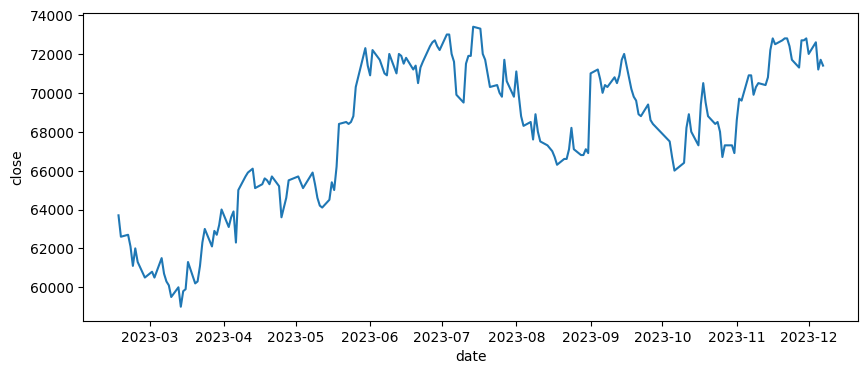

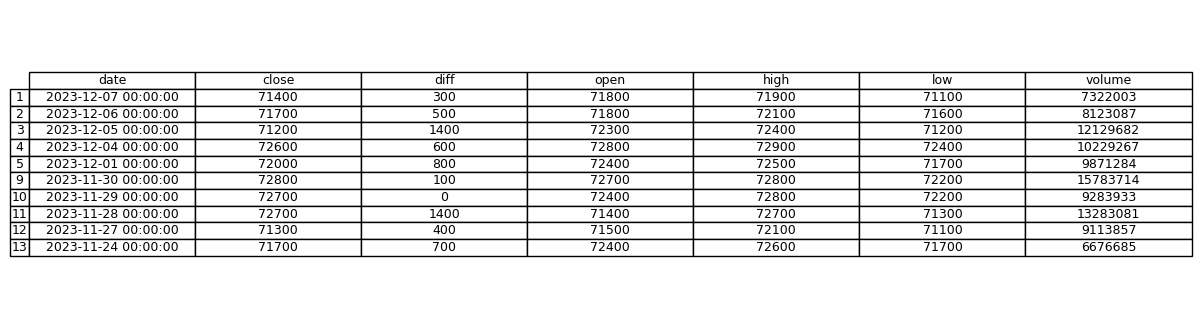

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import os

###############
##차트그리기###
###############

plt.figure(figsize=(10,4))
plt.plot(df['date'],df['close'])
plt.xlabel('date')
plt.ylabel('close')
#############
##차트저장 및 출력
####################

chart_fname = os.path.join('res/stock_report','{company}_chart.png'.format(company=company))
plt.savefig(chart_fname)


plt.show()


###################
###일별시세 그리기##
####################

plt.figure(figsize=(15,4))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

df= df.sort_values(by=['date'], ascending=False)
table(ax, df.head(10), loc='center', cellLoc='center', rowLoc='center')

###########################
### 일별시세 저장하기#######
#############################
table_fname = os.path.join('res/stock_report','{company}_table.png'.format(company=company))
plt.savefig(table_fname)


plt.show()

(3) 보고서로 작성하기

In [ ]:
!pip install python-pptx

In [ ]:
import datetime
from pptx import Presentation
from pptx.util import Inches
import os

#############################
##파워포인트 객체선언########
#############################
today = datetime.datetime.today().strftime('%Y%m%d')
prs=Presentation() # 파워포인트 객체선언
#####################
#슬라이드 추가 #######
#######################

title_slide_layout = prs.slide_layouts[0] #제목슬라이드 생성
slide = prs.slides.add_slide(title_slide_layout)

#제목- 제목에 값 넣기
title = slide.shapes.title # 제목
title.text = '주식보고서' #제목에 값 넣기

#부제목
subtitle = slide.placeholders[1] # 제목상자는 placeholders[0], 부제목상자는 [1]
subtitle.text = '보고서 작성일 : {date}'.format(date=today)

######################
##차트 및 테이블 슬라이드추가
########################
title_only_slide_layout= prs.slide_layouts[5] # 제목만있는 슬라이드
slide = prs.slides.add_slide(title_only_slide_layout)

shapes = slide.shapes
shapes.title.text = '{company},{close}원에 거래마감'.format(company=company, close=df.iloc[0]['close'])
print(shapes.title.text)

#차트추가
top = Inches (2)
left = Inches(0.5)
height = Inches (2.5)
width = Inches (9)
pic = slide.shapes.add_picture(chart_fname,left=left, top=top, width=width, height=height)

#테이블 추가
top = Inches (4)
left = Inches(-1)
height = Inches (3)
width = Inches (12)
pic = slide.shapes.add_picture(table_fname,left=left, top=top, width=width, height=height)

cursor_sp = slide.shapes[0]._element
cursor_sp.addprevious(pic._element)

##################
####보고서저장######
#####################

ppt_fname= os.path.join('res/stock_report','stock_report.pptx')
prs.save(ppt_fname)

삼성전자,71400원에 거래마감


(4) 보고서를 이메일로 전송하기


In [23]:
import smtplib

# 이메일 메시지에 다양한 형식을 중첩하여 담기 위한 객체
from email.mime.multipart import MIMEMultipart

# 이메일 메시지를 이진 데이터로 바꿔주는 인코더
from email import encoders

# 텍스트 형식
from email.mime.text import MIMEText
# 이미지 형식
from email.mime.image import MIMEImage
# 오디오 형식
from email.mime.audio import MIMEAudio

# 위의 모든 객체들을 생성할 수 있는 기본 객체
# MIMEBase(_maintype, _subtype)
# MIMEBase(<메인 타입>, <서브 타입>)
from email.mime.base import MIMEBase


###############################
## 함수 정의
###############################
def send_email(smtp_info, msg):
  with smtplib.SMTP(smtp_info['smtp_server'], smtp_info['smtp_port']) as server:
    #TLS 보안 연결
    server.starttls()
    #로그인
    server.login(smtp_info['smtp_user_id'], smtp_info['smtp_user_pw'])

    #로그인 된 서버에 이메일 전송
                #메시지를 보낼때는 as_string()메소드를 사용해서 문자열로 바꿔준다.
    response = server.sendmail(msg['From'], msg['To'], msg.as_string())


    #이메일을 성공적으로 보내면 결과는{}
    if not response:
      print('이메일을 성공적으로 보냈습니다.')
    else:
      print(response)


def make_multimsg(msg_dict):
  multi = MIMEMultipart(_subtype='mixed')

  for key, value in msg_dict.items():
    #각 타입에 적절한 MIMExxx()함수를 호출하여 msg객체를 생성한다.
    if key == 'text':
      with open(value['filename'], encoding='utf-8') as fp:
                msg = MIMEText(fp.read(), _subtype=value['subtype'])
    elif key == 'image':
      with open(value['filename'], 'rb') as fp:
                msg = MIMEImage(fp.read(), _subtype=value['subtype'])
    elif key == 'audio':
      with open(value['filename'], 'rb') as fp:
                msg = MIMEAudio(fp.read(), _subtype=value['subtype'])
    else:
      with open(value['filename'], 'rb') as fp:
                msg = MIMEBase(value['maintype'], _subtype=value['subtype'])
                msg.set_payload(fp.read())
                encoders.encode_base64(msg)

    #경로가 있는 경우, 파일의 이름만 추출  ex)res/stock_report/stock_report.pptx  -> stock_report.pptx
    _, fname = os.path.split(value['filename'])
    print(fname)
    #파일 이름을 첨부파일 제목으로 추가
    msg.add_header('Content-Disposition', 'attachment', filename = fname)

    #첨부파일 추가
    multi.attach(msg)
  return multi


###############################
## 함수 호출
###############################
# smtp_info = dict({"smtp_server" : "smtp.naver.com", # SMTP 서버 주소
#                   "smtp_user_id" : "<송신자(sender) 메일 계정>@naver.com",
#                   "smtp_user_pw" : "<송신자(sender) 메일 패스워드>",
#                   "smtp_port" : 587}) # SMTP 서버 포트

smtp_info = dict({"smtp_server" : "smtp.naver.com", # SMTP 서버 주소
                   "smtp_user_id" : "#메일입력#",
                   "smtp_user_pw" : "#메일입력#",
                   "smtp_port" : 587}) # SMTP 서버 포트

msg_dict = {
    'application' : {'maintype' : 'application', 'subtype' : 'octect-stream', 'filename' : 'res/email_sending/test.pdf'} # 그외 첨부파일
}

#메일 내용 작성
title = '({date}). 주식 보고서 분석 자료 입니다.'.format(date=today)
content = '주식 보고서 분석 자료 입니다.'
sender = smtp_info['smtp_user_id']
receiver = '#메일입력#'

msg = MIMEText(_text = content, _charset='utf-8')

#첨부파일 추가
msg_dict['application']['filename'] = ppt_fname
multi = make_multimsg(msg_dict)
multi['Subject'] = title
multi['From'] = sender
multi['To'] = receiver
multi.attach(msg)

send_email(smtp_info, multi)







stock_report.pptx
이메일을 성공적으로 보냈습니다.
